# Adetutu B Data Cleaning Project

# C4 Quality Check

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: matplotlib in c:\anacondapython\lib\site-packages (3.8.0)



In [2]:
#Importing python libraries
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from scipy import stats
%matplotlib inline

#Loading the medical_raw_data.csv without the unnamed column
df = pd.read_csv('./medical_raw_data.csv', index_col = 0)

#Viewing the database information (data types, value amounts, etc)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  Timezone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            7412 non-null   float64
 15  Age                 7586 non-null   float64
 16  Education

In [3]:
#Checking for duplicates/making sure the unnamed column is not accounted as a duplicate of the placeholder (CaseOrder) column
print (df[df.duplicated()])

Empty DataFrame
Columns: [CaseOrder, Customer_id, Interaction, UID, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, ReAdmis, VitD_levels, Doc_visits, Full_meals_eaten, VitD_supp, Soft_drink, Initial_admin, HighBlood, Stroke, Complication_risk, Overweight, Arthritis, Diabetes, Hyperlipidemia, BackPain, Anxiety, Allergic_rhinitis, Reflux_esophagitis, Asthma, Services, Initial_days, TotalCharge, Additional_charges, Item1, Item2, Item3, Item4, Item5, Item6, Item7, Item8]
Index: []

[0 rows x 52 columns]


In [4]:
#Visually inspecting the data frame to check for anomolies
pd.set_option("display.max_columns", None)
df

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1.0,53.0,"Some College, Less than 1 Year",Full Time,86575.93,Divorced,Male,No,17.802330,6,0,0,NaN,Emergency Admission,Yes,No,Medium,0.0,Yes,Yes,No,Yes,1.0,Yes,No,Yes,Blood Work,10.585770,3191.048774,17939.403420,3,3,2,2,4,3,3,4
2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3.0,51.0,"Some College, 1 or More Years, No Degree",Full Time,46805.99,Married,Female,No,18.994640,4,2,1,No,Emergency Admission,Yes,No,High,1.0,No,No,No,No,NaN,No,Yes,No,Intravenous,15.129562,4214.905346,17612.998120,3,4,3,4,4,4,3,3
3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3.0,53.0,"Some College, 1 or More Years, No Degree",Retired,14370.14,Widowed,Female,No,17.415889,4,1,0,No,Elective Admission,Yes,No,Medium,1.0,No,Yes,No,No,NaN,No,No,No,Blood Work,4.772177,2177.586768,17505.192460,2,4,4,4,3,4,3,3
4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0.0,78.0,GED or Alternative Credential,Retired,39741.49,Married,Male,No,17.420079,4,1,0,No,Elective Admission,No,Yes,Medium,0.0,Yes,No,No,No,NaN,No,Yes,Yes,Blood Work,1.714879,2465.118965,12993.437350,3,5,5,3,4,5,5,5
5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,NaN,22.0,Regular High School Diploma,Full Time,1209.56,Widowed,Female,No,16.870524,5,0,2,Yes,Elective Admission,No,No,Low,0.0,No,No,Yes,No,0.0,Yes,No,No,CT Scan,1.254807,1885.655137,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,4762,Urban,America/New_York,"Programmer, multimedia",NaN,25.0,Bachelor's Degree,Student,45967.61,Widowed,Male,No,16.481612,4,2,1,No,Emergency Admission,Yes,No,Medium,NaN,No,No,No,No,1.0,No,Yes,No,Intravenous,51.561217,6651.241294,8927.642189,3,2,2,3,4,3,4,2
9997,9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,1251,Urban,America/New_York,"Restaurant manager, fast food",4.0,87.0,Regular High School Diploma,Full Time,14983.02,Widowed,Male,Yes,18.451601,5,0,0,No,Elective Admission,Yes,No,Medium,1.0,Yes,Yes,No,No,0.0,No,No,Yes,CT Scan,68.668237,7851.522660,28507.147340,3,3,4,2,5,3,4,4
9998,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,532,Rural,America/Chicago,"Psychologist, occupational",3.0,NaN,Regular High School Diploma,Full Time,65917.81,Separated,Female,Yes,15.752751,4,2,0,Yes,Elective Admission,Yes,No,High,1.0,No,No,No,No,1.0,Yes,No,No,Intravenous,NaN,7725.953391,15281.214660,3,3,3,4,4,2,3,2
9999,9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491e

In [5]:
#Verifying the uniqueness of the placeholder variable (should return a result of 10000)
df.CaseOrder.value_counts().count()

10000

In [6]:
#Verifying the uniqueness of the Customer_id column (should return a result of 10000)
df.Customer_id.value_counts().count()

10000

In [7]:
#Verifying the uniqueness of the Interaction column (should return a result of 10000)
df.Interaction.value_counts().count()

10000

In [8]:
#Verifying the uniqueness of the UID column (should return a result of 10000)
df.UID.value_counts().count()

10000

In [9]:
#Verifying if the column can be classified as a categorical data type
df.Area.value_counts()

Area
Rural       3369
Suburban    3328
Urban       3303
Name: count, dtype: int64

In [10]:
#Verifying if the column can be classified as a categorical data type
df.Timezone.value_counts()

Timezone
America/New_York                  3889
America/Chicago                   3771
America/Los_Angeles                937
America/Denver                     612
America/Detroit                    262
America/Indiana/Indianapolis       151
America/Phoenix                    100
America/Boise                       86
America/Anchorage                   50
America/Puerto_Rico                 43
Pacific/Honolulu                    34
America/Menominee                   14
America/Nome                        12
America/Indiana/Vincennes            8
America/Kentucky/Louisville          6
America/Sitka                        6
America/Toronto                      5
America/Indiana/Marengo              3
America/Indiana/Tell_City            3
America/North_Dakota/Beulah          2
America/Yakutat                      1
America/Indiana/Winamac              1
America/Indiana/Knox                 1
America/North_Dakota/New_Salem       1
America/Indiana/Vevay                1
America/Adak    

In [11]:
#Verifying if the column can be classified as a categorical data type
df.Education.value_counts()

Education
Regular High School Diploma                 2444
Bachelor's Degree                           1724
Some College, 1 or More Years, No Degree    1484
9th Grade to 12th Grade, No Diploma          832
Associate's Degree                           797
Master's Degree                              701
Some College, Less than 1 Year               642
Nursery School to 8th Grade                  552
GED or Alternative Credential                389
Professional School Degree                   208
No Schooling Completed                       133
Doctorate Degree                              94
Name: count, dtype: int64

In [12]:
#Verifying if the column can be classified as a categorical data type
df.Employment.value_counts()

Employment
Full Time     6029
Student       1017
Part Time      991
Unemployed     983
Retired        980
Name: count, dtype: int64

In [13]:
#Verifying if the column can be classified as a categorical data type
df.Marital.value_counts()

Marital
Widowed          2045
Married          2023
Separated        1987
Never Married    1984
Divorced         1961
Name: count, dtype: int64

In [14]:
#Verifying if the column can be classified as a categorical data type
df.Gender.value_counts()

Gender
Female                  5018
Male                    4768
Prefer not to answer     214
Name: count, dtype: int64

In [15]:
#Verifying if the column can be classified as a categorical data type
df.Initial_admin.value_counts()

Initial_admin
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: count, dtype: int64

In [16]:
#Verifying if the column can be classified as a categorical data type
df.Complication_risk.value_counts()

Complication_risk
Medium    4517
High      3358
Low       2125
Name: count, dtype: int64

In [17]:
#Verifying if the column can be classified as a categorical data type
df.Services.value_counts()

Services
Blood Work     5265
Intravenous    3130
CT Scan        1225
MRI             380
Name: count, dtype: int64

In [18]:
#Verifying if the survey data can be classified as an ordinal categorical data type
df.Item1.value_counts()

Item1
4    3455
3    3404
5    1377
2    1315
6     225
1     213
7      10
8       1
Name: count, dtype: int64

In [19]:
#Verifying if the survey data can be classified as an ordinal categorical data type
df.Item2.value_counts()

Item2
3    3439
4    3351
5    1421
2    1360
1     213
6     204
7      12
Name: count, dtype: int64

In [20]:
#Verifying if the survey data can be classified as an ordinal categorical data type
df.Item3.value_counts()

Item3
4    3464
3    3379
5    1358
2    1356
6     220
1     211
7      11
8       1
Name: count, dtype: int64

In [21]:
#Verifying if the survey data can be classified as an ordinal categorical data type
df.Item4.value_counts()

Item4
3    3422
4    3394
5    1388
2    1346
6     231
1     207
7      12
Name: count, dtype: int64

In [22]:
#Verifying if the survey data can be classified as an ordinal categorical data type
df.Item5.value_counts()

Item5
4    3446
3    3423
2    1380
5    1308
6     219
1     211
7      13
Name: count, dtype: int64

In [23]:
#Verifying if the survey data can be classified as an ordinal categorical data type
df.Item6.value_counts()

Item6
4    3464
3    3371
5    1403
2    1319
6     220
1     213
7      10
Name: count, dtype: int64

In [24]:
#Verifying if the survey data can be classified as an ordinal categorical data type
df.Item7.value_counts()

Item7
4    3487
3    3456
2    1345
5    1274
1     215
6     212
7      11
Name: count, dtype: int64

In [25]:
#Verifying if the survey data can be classified as an ordinal categorical data type
df.Item8.value_counts()

Item8
3    3401
4    3337
5    1429
2    1391
6     221
1     209
7      12
Name: count, dtype: int64

In [26]:
#Checking the total amount of null values present in the dataset
df.isnull().sum()

CaseOrder                0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children              2588
Age                   2414
Education                0
Employment               0
Income                2464
Marital                  0
Gender                   0
ReAdmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink            2467
Initial_admin            0
HighBlood                0
Stroke                   0
Complication_risk        0
Overweight             982
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
BackPain                 0
Anxiety                984
A

In [27]:
#Stats for Detecing Outliers
with pd.option_context('display.max_columns', 40):
    print(df.describe(include = [np.number]))
    pd.reset_option('display.max_columns')

         CaseOrder           Zip           Lat           Lng     Population  \
count  10000.00000  10000.000000  10000.000000  10000.000000   10000.000000   
mean    5000.50000  50159.323900     38.751099    -91.243080    9965.253800   
std     2886.89568  27469.588208      5.403085     15.205998   14824.758614   
min        1.00000    610.000000     17.967190   -174.209690       0.000000   
25%     2500.75000  27592.000000     35.255120    -97.352982     694.750000   
50%     5000.50000  50207.000000     39.419355    -88.397230    2769.000000   
75%     7500.25000  72411.750000     42.044175    -80.438050   13945.000000   
max    10000.00000  99929.000000     70.560990    -65.290170  122814.000000   

          Children          Age         Income   VitD_levels    Doc_visits  \
count  7412.000000  7586.000000    7536.000000  10000.000000  10000.000000   
mean      2.098219    53.295676   40484.438268     19.412675      5.012200   
std       2.155427    20.659182   28664.861050      6.

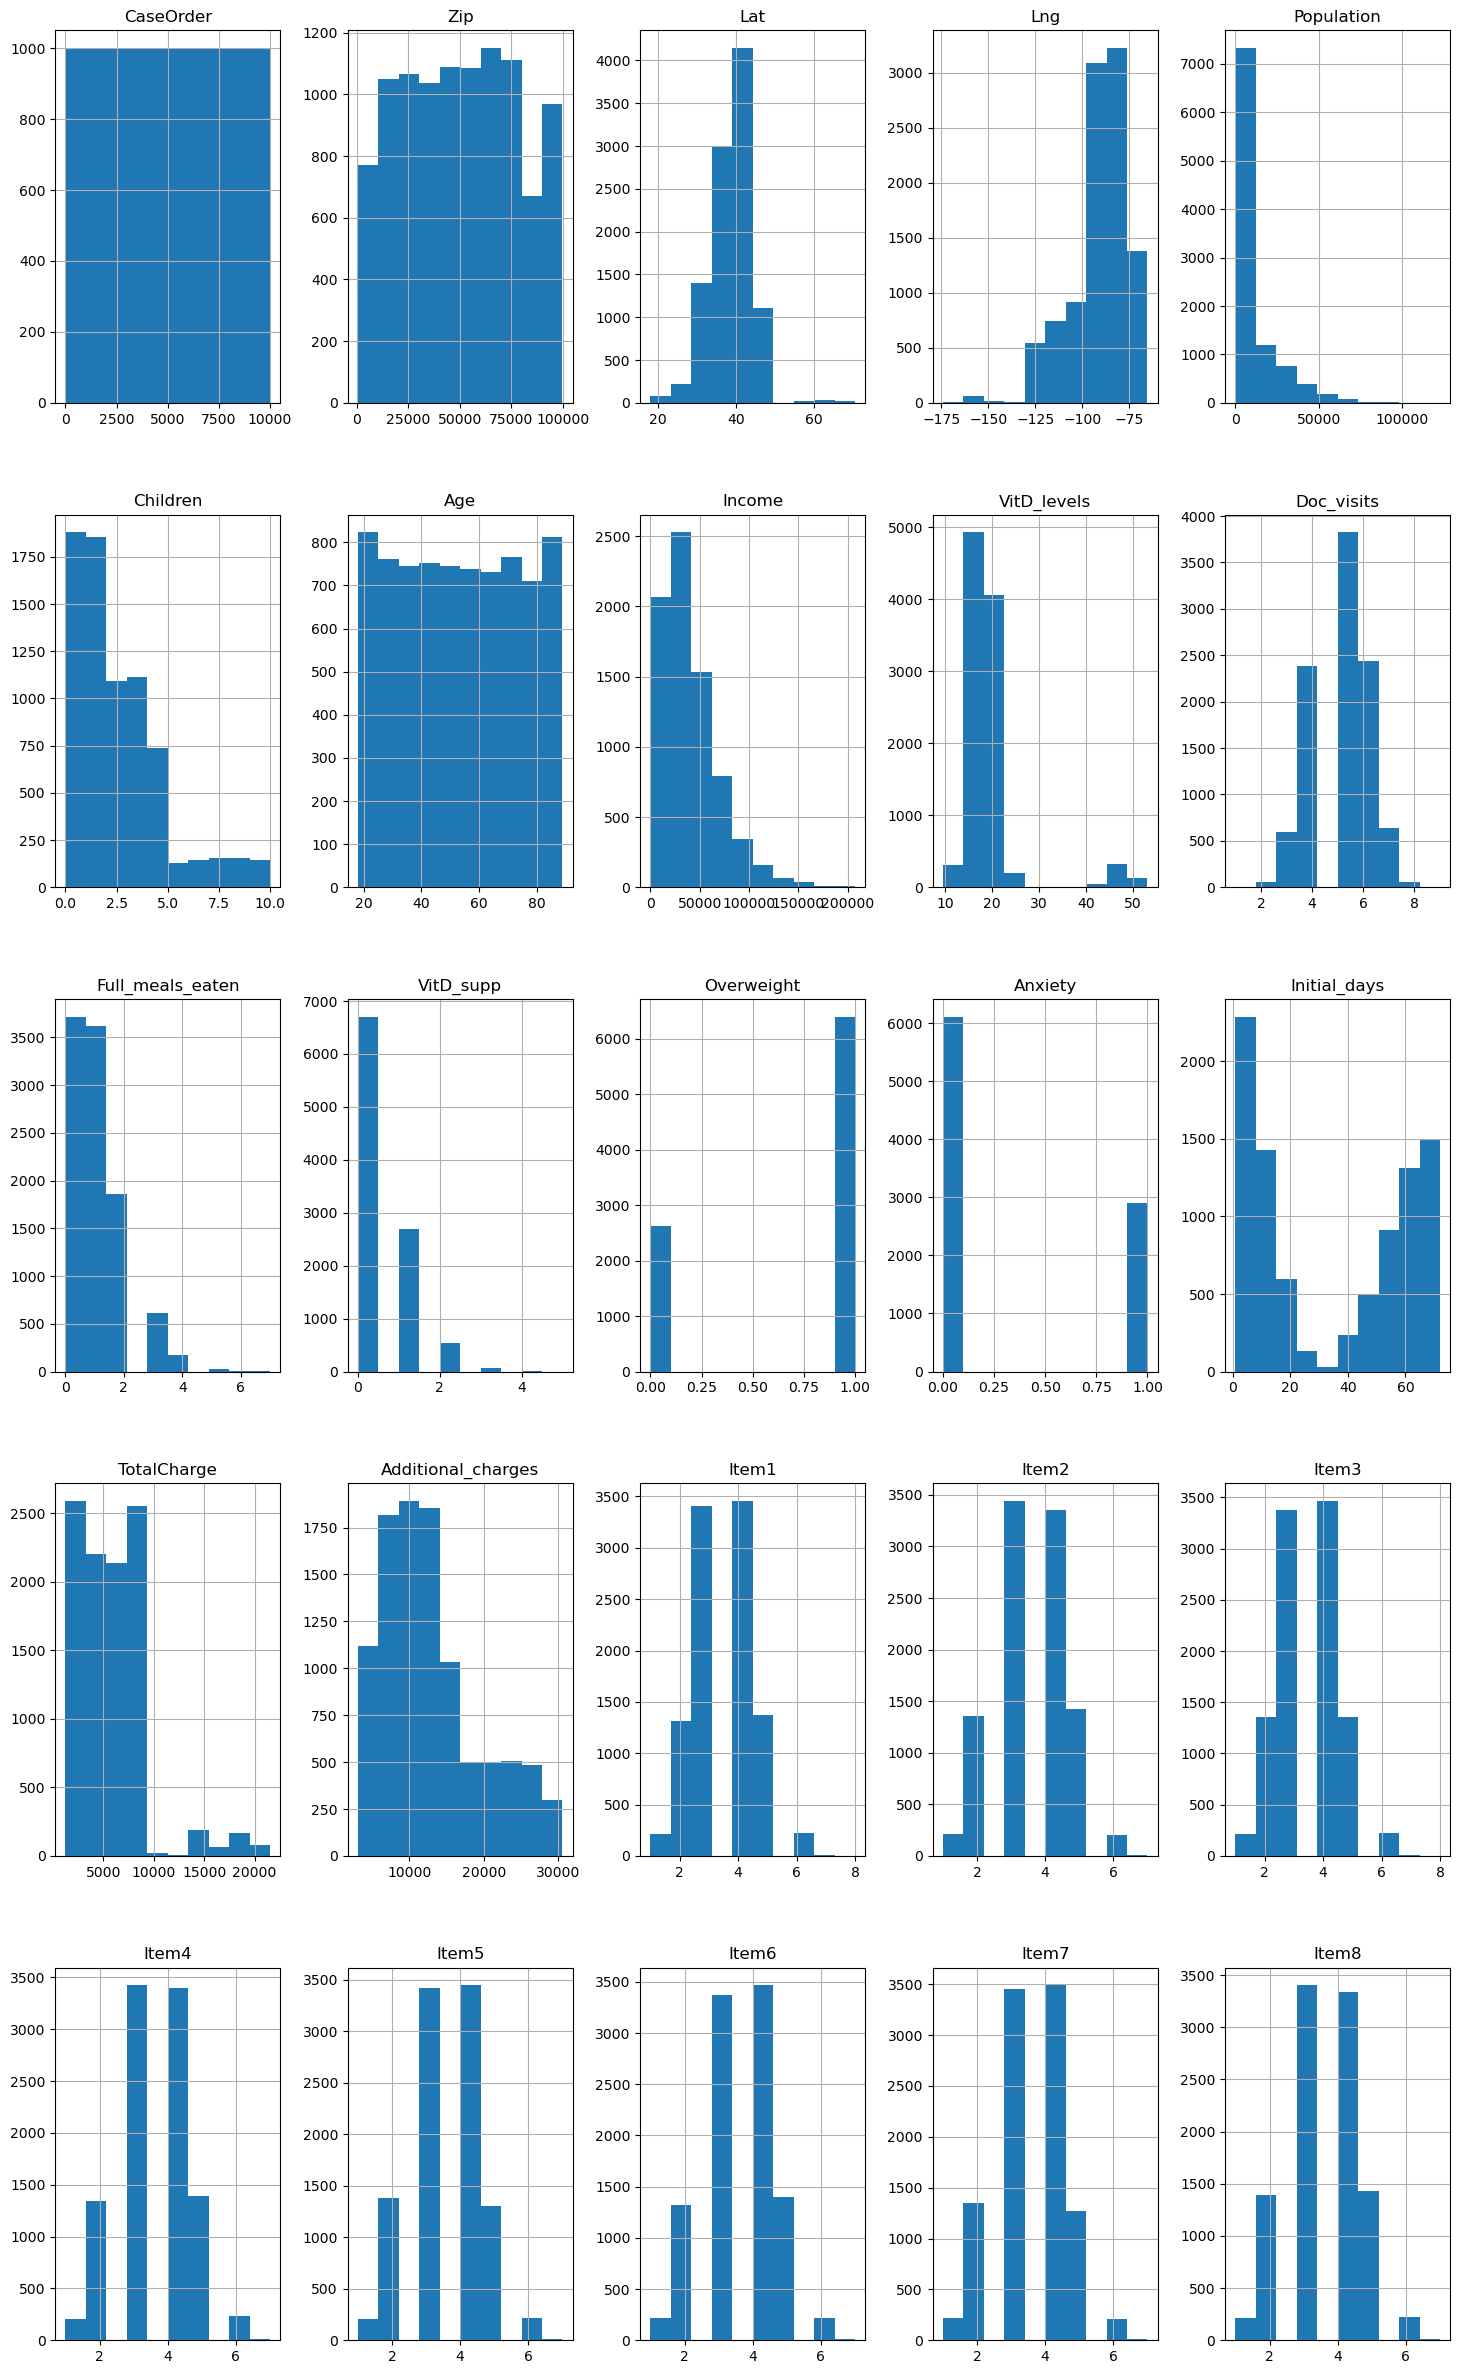

In [28]:
#Using histograms to visualize outliers
df.hist(figsize = (18, 30));

# D4 Code Mitigation

In [29]:
#Filling column blanks and NaNs with the value 0
df.Children.fillna(0, inplace=True)
df.Overweight.fillna(0, inplace=True)
df.Anxiety.fillna(0, inplace=True)
df.Initial_days.fillna(0, inplace=True)

#Changing column types from float to boolean
df['Overweight'] = df['Overweight'].astype('bool')
df['Anxiety'] = df['Anxiety'].astype('bool')

#Changing column types from float to integer
df['Children'] = df['Children'].astype('int64')
df['Initial_days'] = df['Initial_days'].astype('int64')

In [30]:
#Filling column NAs with the 'No'
df['Soft_drink'].fillna('No', inplace=True)
#Changing column type from string to boolean
df['Soft_drink'] = df['Soft_drink'].astype('bool')

In [31]:
#Finding the median age value and filling the blanks with it
median_age = round(df['Age'].median())
df['Age'].fillna(median_age, inplace=True)
#Changing column type from float to integer
df['Age'] = df['Age'].astype('Int64')

In [32]:
#Finding the median income value and filling the blanks with it
median_income = round(df['Income'].median())
df['Income'].fillna(median_income, inplace=True)

In [33]:
#Confirming all missing values were replaced
df.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
Timezone              0
Job                   0
Children              0
Age                   0
Education             0
Employment            0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
VitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days    

In [34]:
#Changing column types from string to boolean
df['ReAdmis'] = df['ReAdmis'].astype('bool')
df['HighBlood'] = df['HighBlood'].astype('bool')
df['Stroke'] = df['Stroke'].astype('bool')
df['Arthritis'] = df['Arthritis'].astype('bool')
df['Diabetes'] = df['Diabetes'].astype('bool')
df['Hyperlipidemia'] = df['Hyperlipidemia'].astype('bool')
df['BackPain'] = df['BackPain'].astype('bool')
df['Allergic_rhinitis'] = df['Allergic_rhinitis'].astype('bool')
df['Reflux_esophagitis'] = df['Reflux_esophagitis'].astype('bool')
df['Asthma'] = df['Asthma'].astype('bool')

In [35]:
#Changing column type from integer to string and restoring leading 0's
df['Zip'] = df['Zip'].astype('str').str.zfill(5)

In [36]:
#Changing column types from string to category
df['Area'] = df['Area'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Employment'] = df['Employment'].astype('category')
df['Marital'] = df['Marital'].astype('category')
df['Initial_admin'] = df['Initial_admin'].astype('category')
df['Complication_risk'] = df['Complication_risk'].astype('category')
df['Services'] = df['Services'].astype('category')

#Replacing response options to reflect the data dictionary
df.Gender.replace({
    'Prefer not to answer': 'Non-Binary'
}, inplace=True)
#Changing column type from string to category
df['Gender'] = df['Gender'].astype('category')

In [37]:
#Adjusting column decimal places from 6 to 2 places
df['TotalCharge'] = df.TotalCharge.round(2)
df['Additional_charges'] = df.Additional_charges.round(2)

#Standardizing the column to properly reflect time-zone values [In-text citation: (Indiana Destination Development Corporation, n.d.)]
df.Timezone.replace({
    #US Central Time
    'America/Chicago': 'US/CT',
    'America/North_Dakota/Beulah': 'US/CT',
    'America/North_Dakota/New_Salem': 'US/CT',
    'America/Menominee': 'US/CT',
    'America/Indiana/Tell_City': 'US/CT',
    'America/Indiana/Knox': 'US/CT',
    #US Eastern Time
    'America/New_York': 'US/ET',
    'America/Detroit': 'US/ET',
    'America/Toronto': 'US/ET',
    'America/Kentucky/Louisville': 'US/ET',
    'America/Indiana/Marengo': 'US/ET',
    'America/Indiana/Winamac': 'US/ET',
    'America/Indiana/Indianapolis': 'US/ET',
    'America/Indiana/Vincennes': 'US/ET',
    'America/Indiana/Vevay': 'US/ET',
    #US Alaska Time
    'America/Anchorage': 'US/AKDT',
    'America/Nome': 'US/AKDT',
    'America/Sitka': 'US/AKDT',
    'America/Yakutat': 'US/AKDT',
    #US Pacific Time
    'America/Los_Angeles': 'US/PT',
    #US Mountain/Mountain Standard Time
    'America/Boise': 'US/MT',
    'America/Denver': 'US/MT',
    'America/Phoenix': 'US/MST',
    #US Hawaii Standard/Hawaii-Aleutian Time
    'Pacific/Honolulu': 'US/HST',
    'America/Adak': 'US/HDT',
    #US Atlantic Time
    'America/Puerto_Rico': 'US/AST'
}, inplace=True)

#Changing column type from string to category
df['Timezone'] = df['Timezone'].astype('category')

In [38]:
#Set up survey response columns to reflect an ordinal categorical datatype
survey_rankings = CategoricalDtype(categories=['1', '2', '3', '4', '5', '6', '7', '8'], ordered=True)

#Mapping the integer as string, then changing column types to ordinal categorical (allowing the data to be transformed to a string before casting the columns will mitigate error messages when attempting to categorize) 
df['Item1'] = df['Item1'].map(str)
df['Item1'] = df['Item1'].astype(survey_rankings)
df['Item2'] = df['Item2'].map(str)
df['Item2'] = df['Item2'].astype(survey_rankings)
df['Item3'] = df['Item3'].map(str)
df['Item3'] = df['Item3'].astype(survey_rankings)
df['Item4'] = df['Item4'].map(str)
df['Item4'] = df['Item4'].astype(survey_rankings)
df['Item5'] = df['Item5'].map(str)
df['Item5'] = df['Item5'].astype(survey_rankings)
df['Item6'] = df['Item6'].map(str)
df['Item6'] = df['Item6'].astype(survey_rankings)
df['Item7'] = df['Item7'].map(str)
df['Item7'] = df['Item7'].astype(survey_rankings)
df['Item8'] = df['Item8'].map(str)
df['Item8'] = df['Item8'].astype(survey_rankings)

In [39]:
#Updating column names with python casing
new_names = {
    'CaseOrder': 'case_order',
    'Customer_id': 'customer_id',
    'Interaction': 'interaction',
    'UID': 'uid',
    'City': 'city',
    'State': 'state',
    'County': 'county',
    'Zip': 'zip_code',
    'Lat': 'latitude',
    'Lng': 'longitude',
    'Population': 'population',
    'Area': 'area_type',
    'Timezone': 'timezone',
    'Job': 'job_title',
    'Children': 'children',
    'Age': 'age',
    'Education': 'highest_education',
    'Employment': 'employment_status',
    'Income': 'income',
    'Marital': 'marital_status',
    'Gender': 'gender',
    'ReAdmis': 'readmission',
    'VitD_levels': 'vitamin_d_level',
    'Doc_visits': 'doctor_visits',
    'Full_meals_eaten': 'full_meals_eaten',
    'VitD_supp': 'vitamin_d_supplements',
    'Soft_drink': 'soft_drink',
    'Initial_admin': 'initial_admit_type',
    'HighBlood': 'high_bp',
    'Stroke': 'stroke',
    'Complication_risk': 'complication_risk',
    'Overweight': 'overweight',
    'Arthritis': 'arthritis',
    'Diabetes': 'diabetes',
    'Hyperlipidemia': 'hyperlipidemia',
    'BackPain': 'back_pain',
    'Anxiety': 'anxiety',
    'Allergic_rhinitis': 'allergic_rhinitis',
    'Reflux_esophagitis': 'reflux_esophagitis',
    'Asthma': 'asthma',
    'Services': 'services',
    'Initial_days': 'initial_stay',
    'TotalCharge': 'daily_charge',
    'Additional_charges': 'additional_charge',
    'Item1': 'srv1_timely_admission',
    'Item2': 'srv2_timely_treatment',
    'Item3': 'srv3_timely_visits',
    'Item4': 'srv4_reliability',
    'Item5': 'srv5_options',
    'Item6': 'srv6_treatment_hours',
    'Item7': 'srv7_courteous_staff',
    'Item8': 'srv8_doctor_listening'}
df.rename(columns=new_names, inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 52 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_order             10000 non-null  int64   
 1   customer_id            10000 non-null  object  
 2   interaction            10000 non-null  object  
 3   uid                    10000 non-null  object  
 4   city                   10000 non-null  object  
 5   state                  10000 non-null  object  
 6   county                 10000 non-null  object  
 7   zip_code               10000 non-null  object  
 8   latitude               10000 non-null  float64 
 9   longitude              10000 non-null  float64 
 10  population             10000 non-null  int64   
 11  area_type              10000 non-null  category
 12  timezone               10000 non-null  category
 13  job_title              10000 non-null  object  
 14  children               10000 non-null  int6

In [41]:
df.head(25)

,case_order,customer_id,interaction,uid,city,state,county,zip_code,latitude,longitude,population,area_type,timezone,job_title,children,age,highest_education,employment_status,income,marital_status,gender,readmission,vitamin_d_level,doctor_visits,full_meals_eaten,vitamin_d_supplements,soft_drink,initial_admit_type,high_bp,stroke,complication_risk,overweight,arthritis,diabetes,hyperlipidemia,back_pain,anxiety,allergic_rhinitis,reflux_esophagitis,asthma,services,initial_stay,daily_charge,additional_charge,srv1_timely_admission,srv2_timely_treatment,srv3_timely_visits,srv4_reliability,srv5_options,srv6_treatment_hours,srv7_courteous_staff,srv8_doctor_listening
1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,US/CT,"Psychologist, sport and exercise",1,53,"Some College, Less than 1 Year",Full Time,86575.93,Divorced,Male,True,17.802330,6,0,0,True,Emergency Admission,True,True,Medium,False,True,True,True,True,True,True,True,True,Blood Work,10,3191.05,17939.40,3,3,2,2,4,3,3,4
2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,US/CT,Community development worker,3,51,"Some College, 1 or More Years, No Degree",Full Time,46805.99,Married,Female,True,18.994640,4,2,1,True,Emergency Admission,True,True,High,True,True,True,True,True,False,True,True,True,Intravenous,15,4214.91,17613.00,3,4,3,4,4,4,3,3
3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,US/CT,Chief Executive Officer,3,53,"Some College, 1 or More Years, No Degree",Retired,14370.14,Widowed,Female,True,17.415889,4,1,0,True,Elective Admission,True,True,Medium,True,True,True,True,True,False,True,True,True,Blood Work,4,2177.59,17505.19,2,4,4,4,3,4,3,3
4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,US/CT,Early years teacher,0,78,GED or Alternative Credential,Retired,39741.49,Married,Male,True,17.420079,4,1,0,True,Elective Admission,True,True,Medium,False,True,True,True,True,False,True,True,True,Blood Work,1,2465.12,12993.44,3,5,5,3,4,5,5,5
5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,US/ET,Health promotion specialist,0,22,Regular High School Diploma,Full Time,1209.56,Widowed,Female,True,16.870524,5,0,2,True,Elective Admission,True,True,Low,False,True,True,True,True,False,True,True,True,CT Scan,1,1885.66,3716.53,2,1,3,3,5,3,4,3
6,6,S543885,e3b0a319-9e2e-4a23-8752-2fdc736c30f4,03e447146d4a32e1aaf75727c3d1230c,Braggs,OK,Muskogee,74423,35.67302,-95.19180,981,Urban,US/CT,Corporate treasurer,0,76,Regular High School Diploma,Retired,33942.00,Never Married,Male,True,19.956143,6,0,0,True,Observation Admission,True,True,Medium,True,True,True,True,True,False,True,True,True,Blood Work,5,2774.09,12742.59,4,5,4,4,3,5,4,6
7,7,E543302,2fccb53e-bd9a-4eaa-a53c-9dfc0cb83f94,e4884a42ba809df6a89ded6c97f460d4,Thompson,OH,Geauga,44086,41.67511,-81.05788,2558,Rural,US/ET,Hydrologist,0,50,Bachelor's Degree,Retired,10456.05,Never Married,Male,True,14.348350,6,0,0,True,Emergency Admission,True,True,Low,True,True,True,True,True,True,True,True,True,Intravenous,9,3533.29,16815.51,4,3,3,2,3,4,5,5
8,8,K477307,ab634508-dd8c-42e5-a4e4-d101a46f2431,5f78b8699d1aa9b950b562073f629ca2,Strasburg,VA,Shenandoah,22641,39.08062,-78.39150,479,Urban,US/ET,Psychiatric nurse,7,40,Master's Degree,Full Time,33942.00,Divorced,Female,True,20.425926,7,2,0,True,Observation Admission,True,True,Medium,True,True,True,True,True,False,True,True,True,Intravenous,0,3316.40,6930.57,1,2,2,5,4,2,4,2
9,9,Q870521,67b386eb-1d04-4020-9474-542a09d304e3,e8e016144bfbe14974752d834f530e26,Panama City,FL,Bay,32404,30.20097,-85.50610,40029,Urban,US/CT,Computer games developer,0,48,Regular High School D

## D5 Data CSV

In [42]:
#Saving the cleaned data in a CSV file
df.to_csv('clean_data.csv', index=False)

## E1 PCA

In [43]:
#Storing numeric variables in a new data frame to use for PCA
medical = df[['latitude', 'longitude', 'population', 'children', 'age', 'income', 'vitamin_d_level', 'doctor_visits', 'full_meals_eaten', 'vitamin_d_supplements', 'initial_stay', 'daily_charge', 'additional_charge']]
#Normalizing the data before calling the PCA
medical_normalized = (medical-medical.mean())/medical.std()
#Setting the amount of components I want from the analysis
pca = PCA(n_components=medical.shape[1])
#Fitting normalized data
pca.fit(medical_normalized)
#Creating a new dataset for the PCA to convert and load components for each variable
medical_pca = pd.DataFrame(pca.transform(medical_normalized), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13'])
medical_loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13'], index=medical_normalized.columns)
medical_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
latitude,-0.019982,-0.008145,-0.715228,0.127639,-0.045051,-0.035083,-0.026860,-0.066751,-0.006144,-0.041580,0.679158,-0.014990,0.002623
longitude,-0.003419,0.016842,0.270110,-0.630585,-0.209971,-0.450317,0.299904,-0.002067,-0.167276,0.129056,0.384132,0.009592,0.000451
population,0.022666,-0.024893,0.631223,0.299474,0.122230,0.255101,-0.196929,-0.053961,0.092745,-0.021094,0.616234,-0.015463,-0.000432
children,-0.000770,0.011103,0.015434,0.237951,0.100231,0.271479,0.841868,-0.345998,-0.122335,0.125514,-0.002029,-0.009498,0.000552
age,0.094387,0.699653,0.006920,0.006639,-0.028994,0.002557,-0.013319,0.000272,-0.007955,-0.028385,-0.002557,-0.706596,0.017530
income,-0.007726,-0.004840,0.045269,0.258038,0.411356,-0.370044,0.278150,0.582622,-0.150237,-0.428287,0.047582,-0.007463,0.000288
vitamin_d_level,0.558046,-0.066828,-0.044486,-0.197506,0.366882,-0.072761,0.023314,-0.202413,0.364145,-0.105013,0.006013,-0.023635,-0.563467
doctor_visits,-0.006497,0.013141,0.014009,0.204519,0.413239,-0.419841,-0.267797,-0.429850,-0.511508,0.298812,-0.057282,-0.005449,-0.000810
full_meals_eaten,-0.005481,0.035309,-0.103721,-0.267278,0.446555,0.362680,-0.006290,0.459441,-0.084658,0.601846,0.070382,-0.009364,0.005148
vitamin_d_supplements,0.033177,0.010290,0.031077,0.406589,-0.187479,-0.443735,0.106236,0.155358,0.512935,0.549092,-0.020323,-0.004878,-0.000375


## E2 PCA Criteria

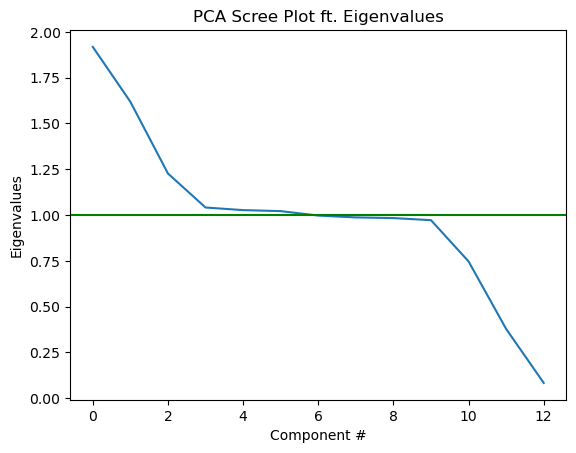

In [44]:
covar_matrix = np.dot(medical_normalized.T, medical_normalized) / medical.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(covar_matrix, eigenvector)) for
eigenvector in pca.components_]

plt.plot(eigenvalues)
plt.title('PCA Scree Plot ft. Eigenvalues')
plt.xlabel('Component #')
plt.ylabel('Eigenvalues')
plt.axhline(y=1, color='green')
plt.show() 

In [45]:
eigenvalues

[1.9175825461780955,
 1.6179608044482654,
 1.226471579650826,
 1.0410534860157434,
 1.0267589532391135,
 1.0213163215236964,
 0.997066548826096,
 0.9869115577227542,
 0.9834021625261434,
 0.9718637621411118,
 0.7466640790014459,
 0.3780962572301816,
 0.08355194149629128]